
# Prediction using Linear Regression


## Author : Rashmi K R

### Predicting the percentage of marks, a student is expected to score based on the total number of hours he/she  studies, using Linear Regression.

# Installing libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Loading dataset

In [4]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

# Exploring the dataset

In [5]:
# to dsiplay first 5 rows

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# to display the last 5 rows

df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#checking for the missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#summary of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#checking the correlation between hours and scores

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Higher correlation between hours and scores

# Visualizing the data 

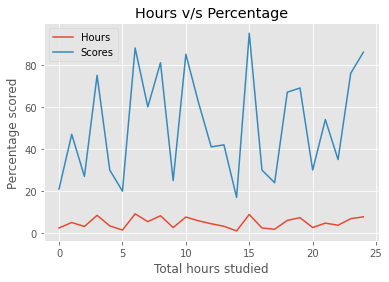

In [11]:
#visualizing with line plot

plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours v/s Percentage')
plt.xlabel('Total hours studied')
plt.ylabel('Percentage scored')
plt.show()

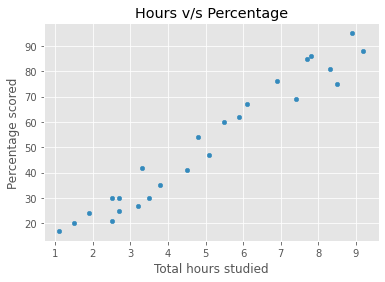

In [12]:
#visualizing with scatter plot

df.plot(kind='scatter', x = 'Hours', y= 'Scores')
plt.title('Hours v/s Percentage')
plt.xlabel('Total hours studied')
plt.ylabel('Percentage scored')
plt.show()

### From the graph we can conclude that, this problem statement can be solved using Linear Regression

# Modeling the data

In [16]:
x = np.asanyarray(df[['Hours']])
y = np.asanyarray(df['Scores'])

# spliting the data into train data and test data
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 2)

LR = LinearRegression()
LR.fit(train_x, train_y)

print('Intercept   : ', LR.intercept_)
print('Coefficients: ', LR.coef_)

Intercept   :  1.5079104828268939
Coefficients:  [9.94061514]


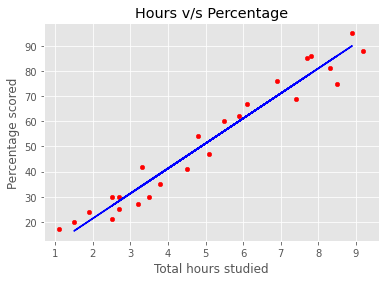

In [17]:
#plot the fit line over the data in linear regression

df.plot(kind='scatter', x='Hours', y='Scores', color='r')
plt.plot(train_x,LR.coef_[0]*train_x + LR.intercept_, color='b')
plt.title('Hours v/s Percentage')
plt.xlabel('Total hours studied')
plt.ylabel('Percentage scored')
plt.show()

# Evaluating the model


In [18]:
# using metrices to find mean avsolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = LR.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred, test_y)))
print('R2-score : %.2f'%r2_score(y_pred, test_y) )

#mean absolute error -> mean of absolute value of errors
#r2_score ->it is not the error, but it is the metric for accuracy of the model. H  

Mean Absolute Error : 4.877039354964476
R2-score : 0.98


In [19]:
# comparing actual v/s predicted values

df2 = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
df2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


# Predicting the score with the single input value

In [21]:
# actualtask to be done

hours = 9.25
predicted_score = LR.predict([[hours]])

print(f'Number of hours studied : {hours}')
print(f'Predicted percentage : {predicted_score[0]}')

Number of hours studied : 9.25
Predicted percentage : 93.45860055685799


### So if you study 9.25 hours per day, then you might score 93.45 % approximately! 